In [11]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [3]:
# Load the dataset using pandas
input = pd.read_feather('C:/Users/Peter/Documents/GitHub/MTG-Land-Recommender/data/input.feather')
output = pd.read_feather('C:/Users/Peter/Documents/GitHub/MTG-Land-Recommender/data/output.feather')

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

In [5]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model with optimizer and loss function
model.compile(optimizer='adam', loss='mse')

# Train the model with the training set
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
233/233 [==============================] - 1s 799us/step - loss: 87.1283
Epoch 2/100
233/233 [==============================] - 0s 733us/step - loss: 42.0148
Epoch 3/100
233/233 [==============================] - 0s 781us/step - loss: 34.3990
Epoch 4/100
233/233 [==============================] - 0s 718us/step - loss: 30.2610
Epoch 5/100
233/233 [==============================] - 0s 725us/step - loss: 27.5542
Epoch 6/100
233/233 [==============================] - 0s 733us/step - loss: 25.6620
Epoch 7/100
233/233 [==============================] - 0s 745us/step - loss: 23.6378
Epoch 8/100
233/233 [==============================] - 0s 725us/step - loss: 21.8794
Epoch 9/100
233/233 [==============================] - 0s 757us/step - loss: 20.5126
Epoch 10/100
233/233 [==============================] - 0s 725us/step - loss: 19.6311
Epoch 11/100
233/233 [==============================] - 0s 720us/step - loss: 18.7938
Epoch 12/100
233/233 [==============================] - 0s 720u

In [7]:
# Evaluate the accuracy of the model with the testing set
mse = model.evaluate(X_test, y_test)
print('Mean squared error:', mse)

59/59 [==============================] - 0s 690us/step - loss: 12.4253
Mean squared error: 12.425274848937988


In [10]:
# Use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the R-squared metric between the predicted and actual values
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

59/59 [==============================] - 0s 621us/step
R-squared: 0.7641493740399432


In [9]:
# Create a random forest regressor with 100 trees
rf_model = RandomForestRegressor(n_estimators=100)

# Train the random forest model with the training set
rf_model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Calculate the mean squared error between the predicted and actual values
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random forest mean squared error:', mse_rf)

# Calculate the R-squared metric between the predicted and actual values
r2_rf = r2_score(y_test, y_pred_rf)
print('Random forest R-squared:', r2_rf)

C:\Users\Peter\AppData\Local\Temp\ipykernel_1652\3167798467.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Random forest mean squared error: 10.523507409881022
Random forest R-squared: 0.8002478469987738


In [35]:
# Convert the y_test DataFrame to a Series
y_test = y_test.squeeze()
y_test

5152    20
1112    30
6399    38
4060    23
5613    20
        ..
8730    15
4245    17
7650    29
7181     6
8517    14
Name: number_of_lands, Length: 1860, dtype: int64

This code will create a scatter plot with the actual number of lands on the x-axis and the predicted number of lands by the neural network on the y-axis. The color of each point represents the difference between the predictions of the random forest model and the neural network model. The color bar on the right shows the range of values for the difference.

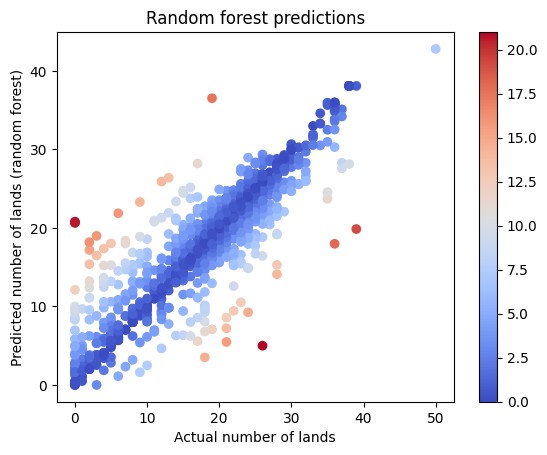

In [36]:
# Calculate the absolute difference between the predicted and actual values for the random forest model
diff_rf = np.abs(y_pred_rf - y_test)

# Convert the diff_rf array to a Pandas DataFrame and then to a Series with length of 1860
diff_rf_series = pd.DataFrame(diff_rf).squeeze()

# Create a scatter plot of the predicted values versus the actual values, color-coded by the absolute difference
plt.scatter(y_test, y_pred_rf, c=diff_rf_series, cmap='coolwarm')
plt.colorbar()
plt.xlabel('Actual number of lands')
plt.ylabel('Predicted number of lands (random forest)')
plt.title('Random forest predictions')
plt.show()

This code will create an array y_pred_baseline with the constant value of 24, with the same shape as y_test. Then, it calculates the MSE between the actual number of lands in the decks and the predicted number of lands, which is the constant value of 24.

You can compare this MSE value with the MSE value of your random forest regressor to evaluate the performance of your model. If the MSE of your model is lower than the baseline MSE, then your model is performing better than the baseline assumption.

In [37]:
# Create an array of the constant value of 24, with the same shape as y_test
y_pred_baseline = np.full_like(y_test, 24)

# Calculate the MSE between the actual number of lands and the predicted number of lands (baseline assumption)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
print('Baseline MSE:', mse_baseline)

Baseline MSE: 73.13655913978495


This code will extract the weights of the model's input layer and the first dense layer 
using the get_weights() method. Then, it calculates the absolute weights of the input features 
and multiplies them with the weights of the first dense layer to obtain the feature importances. 
The feature importances are then normalized and plotted in a bar chart with the feature names 
on the x-axis and the importance values on the y-axis.


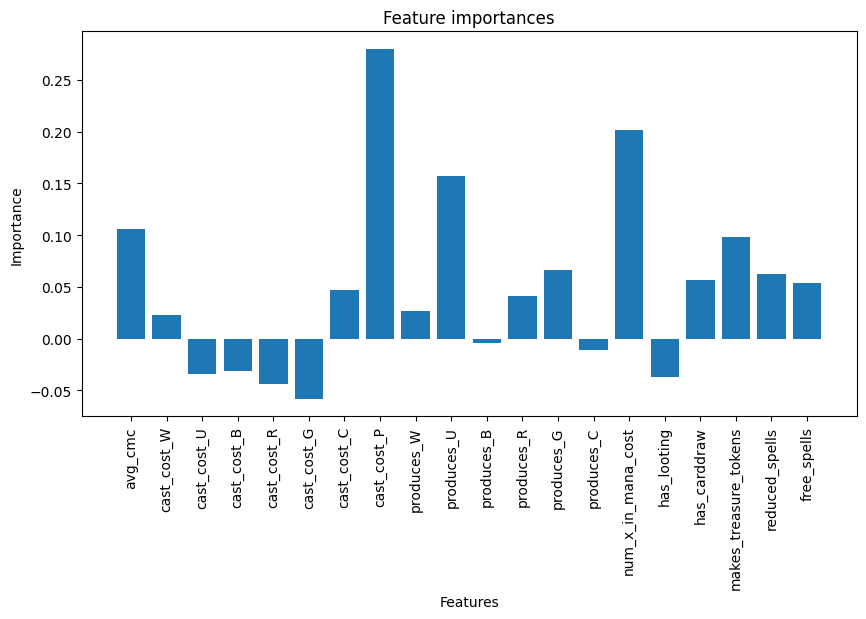

In [42]:
# Get the weights of the model's layers
weights = model.get_weights()

# Extract the weights of the input layer and the first dense layer
input_weights = weights[0]
dense_weights = weights[1]

# Calculate the absolute weights of the input features
abs_input_weights = np.abs(input_weights)

# Multiply the absolute weights of the input features with the weights of the first dense layer
feature_importances = np.dot(abs_input_weights, dense_weights)

# Normalize the feature importances
feature_importances /= np.sum(feature_importances)

# Get the feature names from the original dataset
feature_names = input.columns

# Plot the feature importances in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(input.shape[1]), feature_importances)
plt.xticks(range(input.shape[1]), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importances')
plt.show()


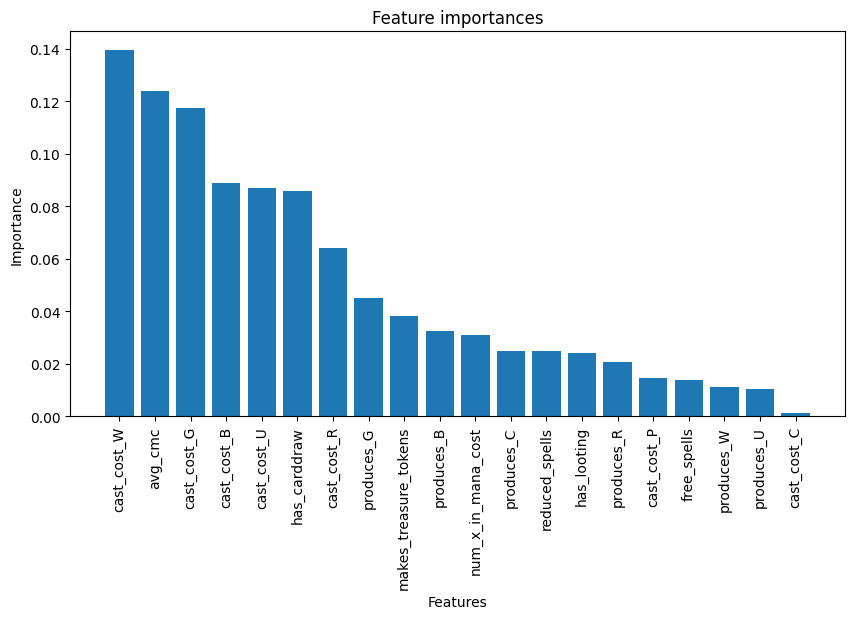

In [46]:
# Get the feature importances from the random forest regressor
importances = rf_model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(input.shape[1]), importances[indices])
plt.xticks(range(input.shape[1]), input.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importances')
plt.show()
